# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Вероятность. 

**Правила, <font color="red">прочитайте внимательно</font>:**


* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [ ]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps


sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики, которые при необходимости можно доработать.

Figure(648x360)
Figure(1080x216)
Figure(648x360)
Figure(648x360)


<Figure size 432x288 with 0 Axes>

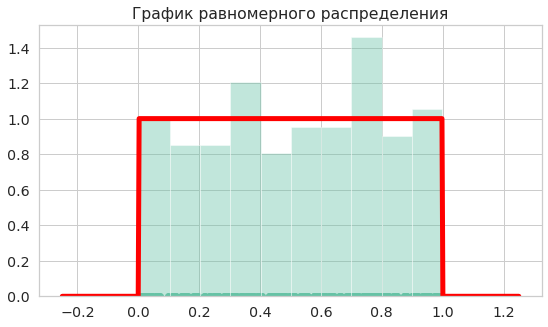

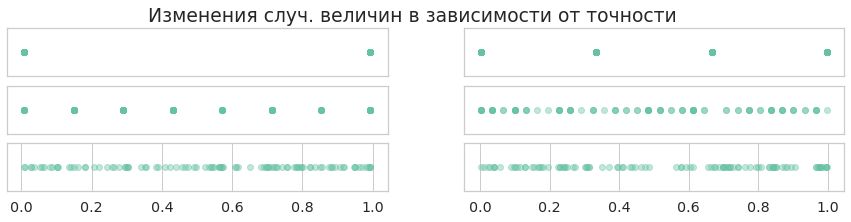

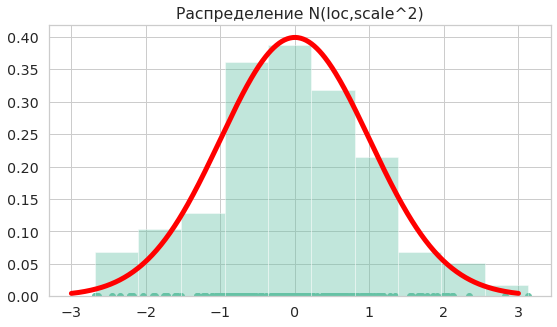

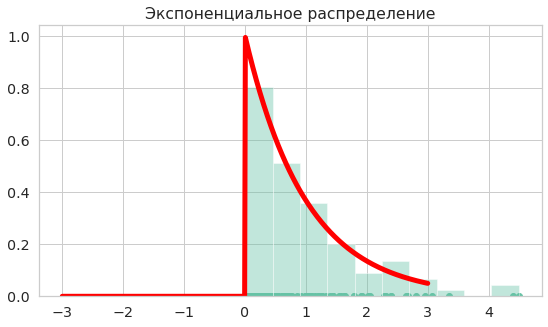

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Закомментируйте строку ниже для запуска локально
#from coin import coin, uniform_pdf, norm_pdf, expon_pdf


#Для запуска локально используйте:

import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf


def uniform(size, precision=30):
    return (np.sum(coin((size + (precision,)) if (type(size) is tuple) else (size, ) + (precision,))*np.logspace(0, precision-1, num=precision, base=2, dtype=int), axis=-1))/pow(2, precision)

def plot_uniform_density(size=200):
    plt.clf()
    test = np.random.uniform(size=size)
    grid = np.linspace(-0.25, 1.25, 500) # равномерная сетка от -0.25 до 1.25 из 500 точек
    plt.figure(figsize=(9,5))
    plt.title("График равномерного распределения")
    plt.scatter(test, y=[0]*len(test))
    plt.hist(test, bins=10, density=True, 
         alpha=0.4, label='Гистограмма выборки')
    plt.plot(grid, uniform_pdf(grid), color='red', 
         lw=5, label='Плотность случайной величины') 
    return plt.gcf()

def plot_uniform_different_precision(size=100):

    plt.figure(figsize=(15, 3))
    plt.title("test")

    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        # plt.<определите подграфик>(3, 2, i + 1)
        sub = plt.subplot(3, 2, i+1)
        plt.suptitle("Изменения случ. величин в зависимости от точности")
        sub.scatter(x=uniform(size=size, precision=precision), y = np.zeros(size), alpha = 0.4)
        plt.yticks([])
        if i < 4:
            plt.xticks([])

    return plt.gcf()

def normal(size=1, loc=0, scale=1, precision=30):

    phi_1 = uniform(size, precision)
    phi_2 = uniform(size, precision)
    ksi_1 = np.cos(2*np.pi*phi_1) * np.sqrt(-2*np.log(phi_2))
    #ksi_2 = np.sin(2*np.pi*phi_1) * np.sqrt(-2*np.log(phi_2))
    
    return loc + scale*ksi_1

def plot_normal_density(size=200):
    test = np.random.normal(size=size)
    grid = np.linspace(-3, 3, 500) # равномерная сетка от -3 до 3 из 500 точек
    plt.figure(figsize=(9,5))
    plt.title("Распределениe N(loc,scale^2)")
    plt.scatter(test, y=[0]*len(test))
    plt.hist(test, bins=10, density=True, 
         alpha=0.4, label='Гистограмма выборки')
    plt.plot(grid, norm_pdf(grid), color='red', 
         lw=5, label='Плотность случайной величины') 
    return plt.gcf()

#plot_normal_density()
def expon(size=1, lambd=1, precision=30):
    return (-1 / lambd * np.log(1 - uniform(size, precision)))

def plot_expon_density(size=100):
    test = expon(size=size)
    grid = np.linspace(-3, 3, 500) # равномерная сетка от -3 до 3 из 500 точек
    plt.figure(figsize=(9,5))
    plt.title("Экспоненциальное распределение")
    plt.scatter(test, y=[0]*len(test))
    plt.hist(test, bins=10, density=True, 
         alpha=0.4, label='Гистограмма выборки')
    plt.plot(grid, expon_pdf(grid), color='red', 
         lw=5, label='Плотность случайной величины') 
    return plt.gcf()

print(plot_uniform_density())
print(plot_uniform_different_precision())
print(plot_normal_density())
print(plot_expon_density())

**Выводы:**
Мы познакомились с методами построения графиков случайных величин и плотностей их распределения. Видно, что гистограммы случайных значений совпадают с графиками плотностей, причем не идеально, а с небольшими неточностями, что характеризует наличие выбросов. Также интересная тенденция наблюдается на графике изменения случайных величин в зависимости от установленной точности: точки начинают сбиваться в группы в окрестностях некоторых значений.

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

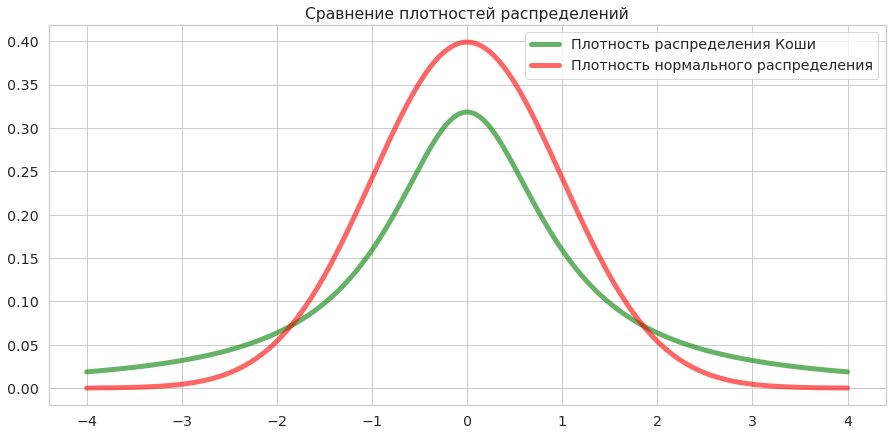

In [7]:
import scipy.stats as sps

test = sps.cauchy()
grid = np.linspace(-4, 4, 1000)

plt.figure(figsize=(15, 7))
plt.plot(grid, sps.cauchy.pdf(grid), 'g-', lw=5, alpha=0.6, label='Плотность распределения Коши')
plt.plot(grid, sps.norm.pdf(grid), 'r-', lw=5, alpha=0.6, label='Плотность нормального распределения')
plt.title("Сравнение плотностей распределений")
plt.legend()

**Вывод:**

Из построенного графика видно, что плотность распределения Коши меньше плотности нормального. Функция распределения Коши имеет вид arctan(x) + π/2. Поэтому плотность распределения Коши быстро убывает на отрезке [-2, 2], и имеет "тяжелые хвосты" на более дальних значениях. В то же время, плотность нормального распределения имеет более гладкую форму.

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

Сгенерируем 500 выборок случайных величин, отображающих закон больших чисел для распределения Коши.

In [4]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.cauchy().rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

Построим все полученные выборки на одном графике.    

Text(0.5, 1.0, 'Визуализация закона больших чисел для распределения Коши')

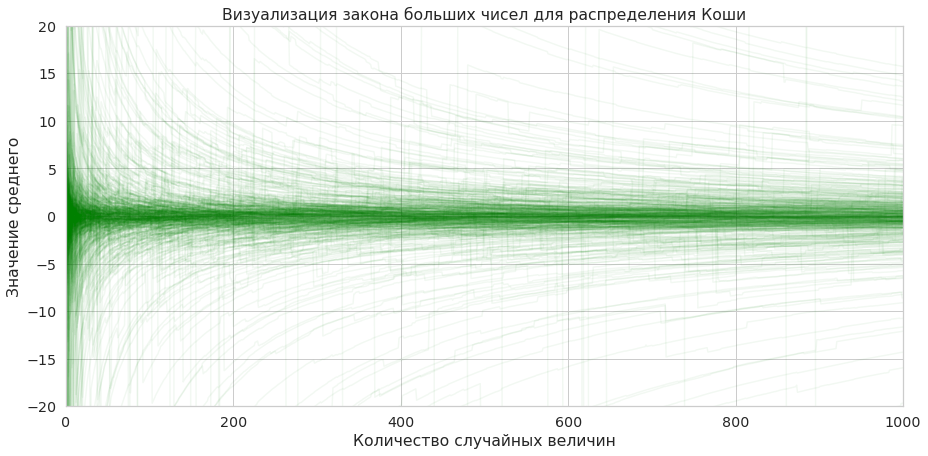

In [14]:
plt.figure(figsize=(15, 7))

for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.05)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size))
plt.ylim((-20, 20))
plt.title('Визуализация закона больших чисел для распределения Коши')

**Вывод:**

Закон больших чисел для распределения Коши не выполняется. Это связано с тем, что данное распределение не имеет мат.ожидания и дисперсии. На графике видно, что с увеличением размера выборки распределение так и не сходится к какому-либо значению. Теория подтверждается практикой.

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

Сгенерируем выборку по распределению Коши

Text(0.5, 1.0, 'Выборочная медиана распределения Коши')

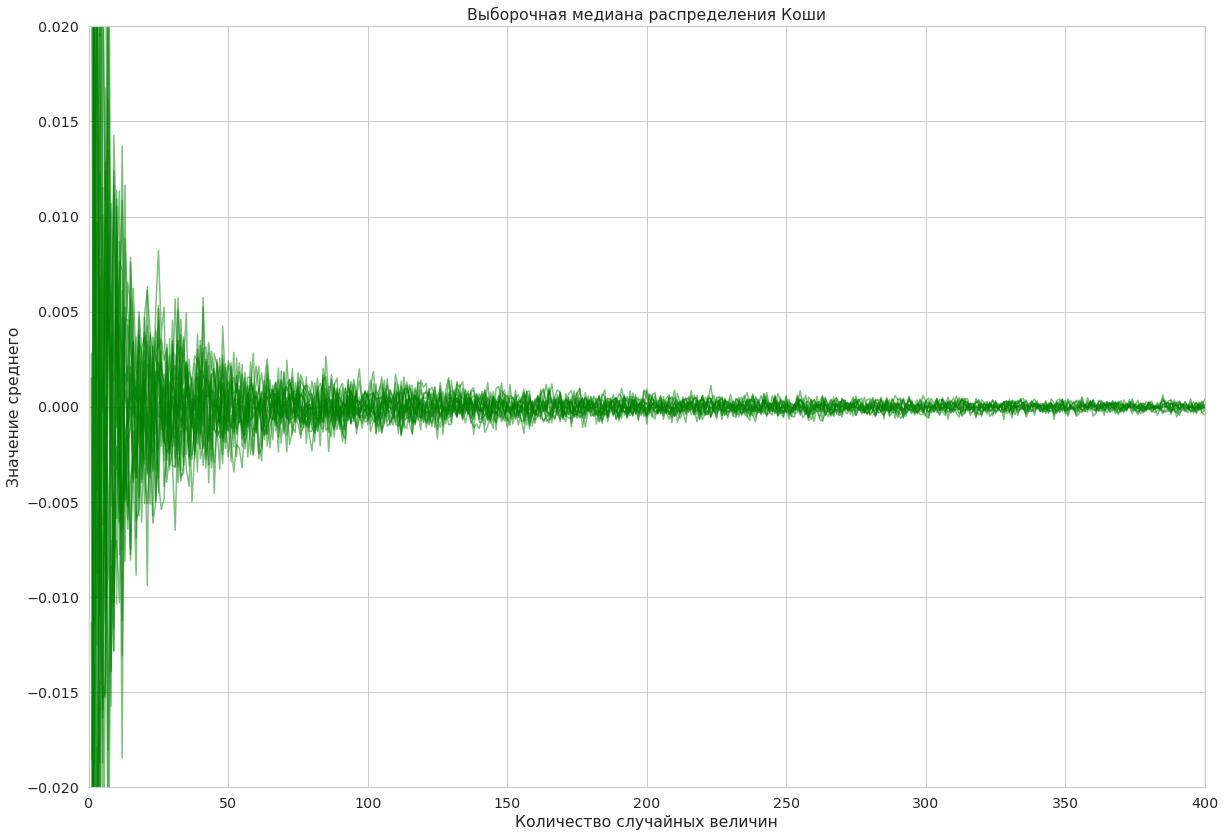

In [29]:
plt.figure(figsize=(20, 14))

for i in range(0, size, 50):
    samples = sps.cauchy().rvs(size=(samples_count, i))
    cum_means = np.median(samples, axis=0) / (np.arange(i) + 1) 
    plt.plot(np.arange(i) + 1, cum_means, color='green', alpha=0.5)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.ylim((-0.02, 0.02))
plt.xlim((0, 400))
plt.title("Выборочная медиана распределения Коши")

**Вывод:**

Из графика можно увидеть, что выборочная медиана с увеличением размера выборки сходится к 0 как нормальное распределение. Действительно, выборочная медиана распределения Коши сходится к $\frac{1}{2}$ квантили как нормальное распределение.


**Общий вывод:**

В задаче 2 были изучены и визуально подтверждены свойства распределения Коши. Можно сделать умозаключение, что данное распределение весьма неудобно для анализа, т.к. не имеет дисперсии и мат. ожидания.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

Посчитаем минимальное n, при котором $F(n) \leqslant 0.02$

In [57]:
def solution(data, posability, length):
    sample_means = np.cumsum(data, axis=1) / np.arange(1, length + 1).reshape(1, -1)
    data = np.abs(sample_means -posability).mean(axis=0)
    return data

size = 10000  # количество случайных величин
k = 500  # количество выборок
deviation = 0.02 # допущенное отклонение

samples = sps.bernoulli(p=0.5).rvs(size=(k, size)) #Генерируем выборки с распределением Бернулли

result = solution(samples, 0.5, size)
final_n = np.where(result <= deviation)[0][0]
print("n =", final_n)

n = 405


Построим графики

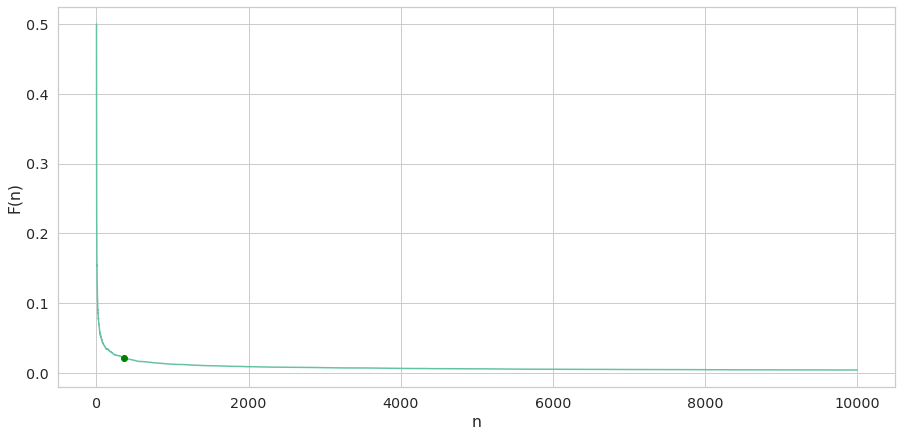

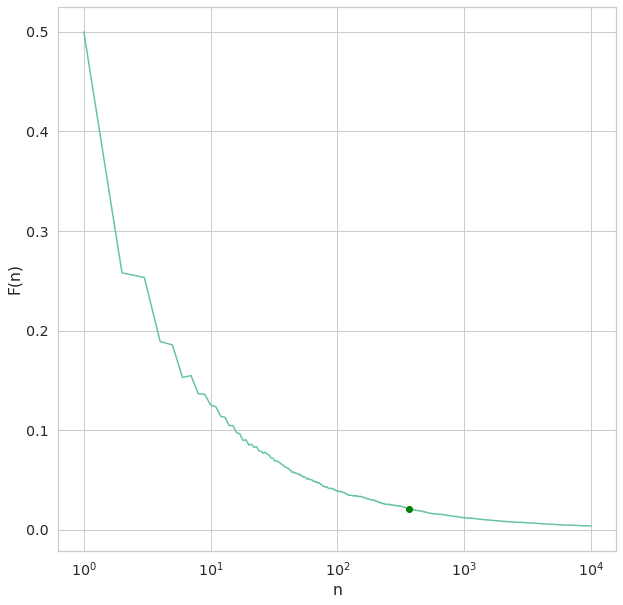

In [58]:
#График в обычном масштабе
plt.figure(figsize=(15, 7))
plt.plot(np.arange(1, size+1), result)
plt.plot(369, result[369], 'go') #Минимальная точка, при которой F < 0.02
plt.ylabel("F(n)")
plt.xlabel("n")

plt.show()

#График в логарифмическом масштабе
plt.figure(figsize=(10, 10))
plt.plot(np.arange(1, size+1), result)
plt.xscale("log")
plt.ylabel("F(n)")
plt.xlabel("n")
plt.plot(369, result[369], 'go') #Минимальная точка, при которой F < 0.02

plt.show()

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

Text(0.5, 1.0, 'Оценка среднего с достаточной точностью при разных параметрах распределения Бернулли. Логарифмический масштаб')

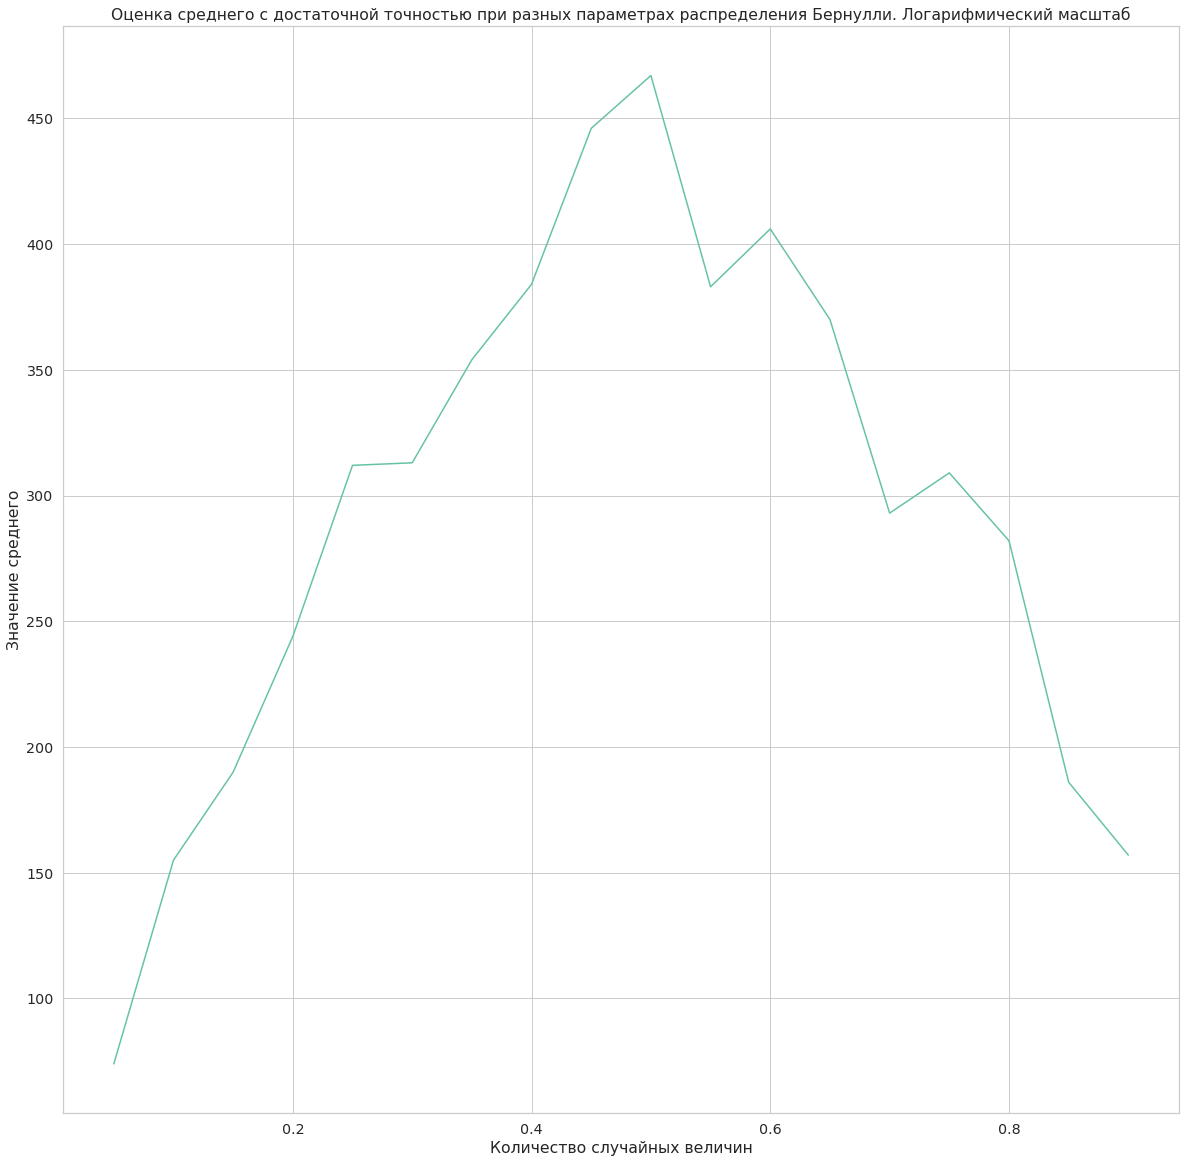

In [22]:
plt.figure(figsize=(20, 20))
colors=plt.cm.jet(np.linspace(0,1,256))#Диапазон цветов
counter = 0
list_n = [0]*18
list_a = [0]*18
for i in range(5, 95, 5):
    a = i/100
    list_a[counter] = a
    # Генерация выборки и вычисление средних
    samples = sps.bernoulli(p=a).rvs(size=(k, size)) #Генерируем выборки с распределением Бернулли
    result = solution(samples, a, size)
    list_n[counter] = np.where(result <= deviation)[0][0]
    counter += 1

# График
plt.plot(list_a, list_n)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.title("Оценка среднего с достаточной точностью при разных параметрах распределения Бернулли. Логарифмический масштаб")

**Выводы:**

1. Формула, используемая для F(n) напоминает корень из дисперсии, т.к. $S_{nj}$ выглядит как мат. ожидание. 
   
   То есть F ~ E($\xi - E(\xi)$). Для распределения Бернулли $D(\xi) = \frac{a * (1 - a)}{n}.$ 
   Получается, F будет обратно зависеть от корня из n, что подтверждается графиком. Действительно, на полученных первых двух графиках видна гиперболическая зависимость, откуда делаем вывод, что чем больше n, тем меньше отклонения.

2. График зависимости n от a выглядит как парабола, что, опять же, отсылает нас к квадратичной зависимости из пункта (1). Максимум достигается в a = 0.5, что говорит о следующем: чем сильнее перевес вероятности выпадения конкретной стороны монетки, тем при меньших n мы получим малое количество выбросов. Этот вывод довольно логичен и соотносится с теорией. 